# __CAR SALES REPORT__

> This Dataset contain data  from Global Car Sales of each brand in market  

<img src='cars.jpg' width=500>

### __Goals for this Project:__
* __Market Analysis:__ Evaluate overall trends and regional variations in car Sales to assess manufacturrer Performance, model preferences and demographic insights.
* __Forecasting and Predictive Analysis:__ Use historical Data for forecasting and predict future market trends. Support marketing, advertising, and investment decisions based on insights.

## Table of Content:
Step 1| [IMPORT LIBRARIES](#step-1-import-libraries)  
Step 2| [LOAD THE DATASET](#step-2-load-dataset)  
Step 3| [EXPLORATORY DATA ANALYSIS (EDA)](#step-3-exploratory-data-analysis-eda)  
* Step 3.1| [Data Structure](#step-31-data-structure)  
* Step 3.2| [Data Shape](#step-32-shape)
* Step 3.3| [Missing Values](#step-33-missing-values)
* Step 3.4| [Data Analysis](#step-34-data-analysis)
    - Step 3.4.1| [Customers](#step-341-customers)
    - Step 3.4.2| [Company](#step-342-company-analysis)
    - Step 3.4.3| [Product](#step-343-product-analysis-cars-models-body-styles)
    - Step 3.4.4| [Price & Sales](#step-344-sales-analysis)

Step 4| [PREDICTIVE MODEL](#step-4-predictive-model)
* Step 4.1| [Dummies Variables](#step-41-dummies-variables)
* Step 4.2| [Dates](#step-42-dates)
* Step 4.3| [Model](#step-43-model)



### __Step 1| Import Libraries__

In [51]:
#Importing Libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


### __Step 2| Load Dataset__

In [52]:
#Loading Dataset
df = pd.read_csv('Car Sales.xlsx - car_data.csv')

#Show first 5 rows
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [53]:
#Lets check unique values present in this data
df.nunique()

Car_id           23906
Date               612
Customer Name     3022
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

Observatios:
* There are 3022 unique customers and 28 dealers in 7 different regions. 
* Also, there are 154 models of car available in 5 different body style, 2 different trasmissin type and in 3 different colours.

### <font color='red'> __Step 3| Exploratory Data Analysis (EDA)__ </font>

##### Step 3.1| __Data Structure__

In [54]:
#Lets check dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23906 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Obsevations:
> * Most Columns have object datatype

In [55]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


##### Step 3.2| __Shape__

In [57]:
df.shape

(23906, 16)

In [58]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

##### Step 3.3| __Missing Values__

In [6]:
df.isnull().sum().sort_values(ascending=False)

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

> Inference: There isn't missing values present in the Dataset

### Step 3.4| __Data Analysis__

##### Step 3.4.1| __Customers__

In [7]:
#Lets check the distribution of male and female in this dataset:
fig = px.bar(df, x=df['Gender'].unique(), y=df['Gender'].value_counts(),
            title='Gender wise Analysis', width=600, height=400,
            text=df['Gender'].value_counts(), color=df['Gender'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Gender", "y":"Count"})

fig.show()

__*Income Analysis
Classification of incomes in Categories*__

In [8]:
#Lets create the intervals for the categories
bins = np.linspace(min(df["Annual Income"]), max(df["Annual Income"]), 6)

bins

array([1.008000e+04, 2.248064e+06, 4.486048e+06, 6.724032e+06,
       8.962016e+06, 1.120000e+07])

In [9]:
# Lets create the group names for each category
group_names = ["Low", "Lower Middle", "Middle", "Upper Middle", "High"]

#Lets Classificate the incomes in each Category
df["Annual Income (binned)"] = pd.cut(df["Annual Income"], bins, labels = group_names, include_lowest=True)

df[["Annual Income", "Annual Income (binned)"]]

,Annual Income,Annual Income (binned)
0,13500,Low
1,1480000,Low
2,1035000,Low
3,13500,Low
4,1465000,Low
...,...,...
23901,13500,Low
23902,900000,Low
23903,705000,Low
23904,13500,Low


In [10]:
#Lets check the distribution of sales for each Company
fig = px.bar(df, x=df['Annual Income (binned)'].unique(), y=df['Annual Income (binned)'].value_counts(),
            title='Annual Income (binned) wise Analysis', width=600, height=400,
            text=df['Annual Income (binned)'].value_counts(), color=df['Annual Income (binned)'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Annual Income (binned)", "y":"Count"})
fig.show()


__*Outliers*__

In [11]:
#Lets check the outliers
fig = px.box(df, y='Annual Income', title="Outliers Analysis",
             width=600, height=400)

fig.show()

In [12]:
fig = px.histogram(df, x=df["Annual Income"], nbins=70, 
                   width=600, height=400)

fig.show()

Observations:
> * Mayority of customers have annual income between 10k  to 2.4Mn


##### Step 3.4.2| __Company Analysis__

__*Dealers*__

In [59]:
df['Dealer_Region'].value_counts()

Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: Dealer_Region, dtype: int64

In [14]:
fig = px.bar(df, x=df['Dealer_Region'].unique(), y=df['Dealer_Region'].value_counts(),
            title='Dealer Region wise Analysis', width=600, height=400,
            text=df['Dealer_Region'].value_counts(), color=df['Dealer_Region'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Dealer_Region", "y":"Count"})

fig.show()

In [15]:
df['Dealer_Name'].value_counts()

Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Star Enterprises Inc                               1249
Tri-State Mack Inc                                 1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
New Castle Ford Lincoln Mercury                     629
McKinney Dodge Chrysler Jeep                        629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab                          628
Pitre Buick-Pontiac-Gmc of Scottsdale               628
Capitol KIA                                     

__*Company*__

In [16]:
df['Company'].value_counts()

Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Company, dtype: int64

In [17]:
#Lets see the distribution of sales for each Company
company_total_sales = df.groupby(["Company"]).size().sort_values(ascending=False).reset_index()

company_total_sales.rename(columns={0:"Company Sales"}, inplace=True)

fig = px.bar(df, x=df['Company'].unique(), y=df['Company'].value_counts(),
            title='Company wise Analysis', width=600, height=400,
            text=df['Company'].value_counts(), color=df['Company'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Company", "y":"Count"})

fig.show()

##### Step 3.4.3| __Product Analysis (Cars, Models, Body style, ...)__

In [18]:
fig = px.bar(df, x=df['Body Style'].unique(), y=df['Body Style'].value_counts(),
            title='Body Style wise Analysis', width=600, height=400,
            text=df['Body Style'].value_counts(), color=df['Body Style'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Body Style", "y":"Count"})

fig.show()

In [19]:
df['Transmission'].value_counts()

Auto      12571
Manual    11335
Name: Transmission, dtype: int64

In [20]:
fig = px.bar(df, x=df['Transmission'].unique(), y=df['Transmission'].value_counts(),
            title='Transmission wise Analysis', width=600, height=400,
            text=df['Transmission'].value_counts(), color=df['Transmission'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Company", "y":"Count"})

fig.show()

In [21]:
df['Model'].value_counts()

Diamante         418
Silhouette       411
Prizm            411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: Model, Length: 154, dtype: int64

In [22]:
#lets check the top 10 Models
top_10_models = df['Model'].value_counts().nlargest(10)

fig = px.bar(top_10_models, x=top_10_models.index, y=top_10_models.values,
            title='Top 10 Models wise Analysis', width=600, height=400,
            text=top_10_models.values, color=top_10_models.values,
            color_continuous_scale='Sunsetdark', labels={"x":"Model", "y":"Count"})

fig.show()

##### Step 3.4.4| __Sales Analysis__

In [23]:
df['Price ($)'].describe()

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64

In [24]:
print('The Mode of Price ($) is:', df['Price ($)'].mode()[0])
print('The Mean of Price ($) is:', df['Price ($)'].mean())
print('The Median of Price ($) is:', df['Price ($)'].median())

The Mode of Price ($) is: 22000
The Mean of Price ($) is: 28090.247845729107
The Median of Price ($) is: 23000.0


In [25]:
#Lets create the intervals for the categories
bins_price = np.linspace(min(df["Price ($)"]), max(df["Price ($)"]), 6)

bins

array([1.008000e+04, 2.248064e+06, 4.486048e+06, 6.724032e+06,
       8.962016e+06, 1.120000e+07])

In [26]:
# Lets create the group names for each category
group_names = ["Low", "Lower Middle", "Middle", "Upper Middle", "High"]
df_prices = df[['Price ($)']]

#Lets Classificate the incomes in each Category
df_prices["Price (binned)"] = pd.cut(df_prices["Price ($)"], bins_price, labels = group_names, include_lowest=True)

df_prices



C:\Users\Briggitte\AppData\Local\Temp\ipykernel_9400\291102974.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Price ($),Price (binned)
0,26000,Lower Middle
1,19000,Lower Middle
2,31500,Lower Middle
3,14000,Low
4,24500,Lower Middle
...,...,...
23901,12000,Low
23902,16000,Low
23903,21000,Lower Middle
23904,31000,Lower Middle


In [27]:
#Lets check the distribution of sales for each Company
fig = px.bar(df_prices, x=df_prices['Price (binned)'].unique(), y=df_prices['Price (binned)'].value_counts(),
            title='Price (binned) wise Analysis', width=600, height=400,
            text=df_prices['Price (binned)'].value_counts(), color=df_prices['Price (binned)'].value_counts(),
            color_continuous_scale='Sunsetdark', labels={"x":"Price (binned)", "y":"Count"})
fig.show()

In [28]:
fig = px.histogram(df, x=df_prices["Price ($)"], nbins=70, 
                   width=600, height=400)

fig.show()

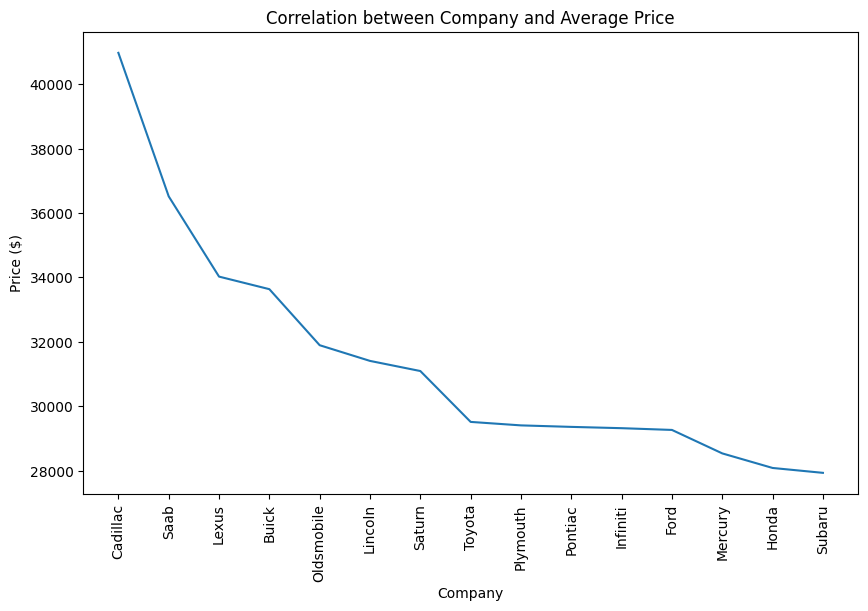

In [29]:
#Lets check correlation between Company and average price they are selling at
company_avg = df.groupby(['Company'])['Price ($)'].mean().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Company', y='Price ($)', data=company_avg)
plt.xticks(rotation=90)

plt.title('Correlation between Company and Average Price')  # Título del gráfico

plt.show()



In [30]:
# Lets check the relation between Price and Transmission
fig = px.scatter(df, x='Price ($)', y='Transmission', color='Price ($)',
                 title='Price & Transmission Analysis',  width=600, height=400,
                 color_continuous_scale='Sunsetdark')

# Muestra la figura
fig.show()

<Axes: xlabel='Price ($)', ylabel='Density'>

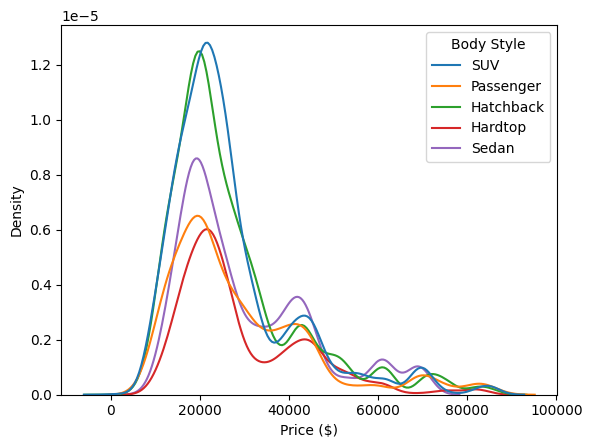

In [31]:
sns.kdeplot(data=df,x='Price ($)',hue='Body Style')

In [32]:
fig = px.box(df, y='Company', x='Price ($)', color='Company',
             width=600, height=400,
             title='Distribution of Price and Compay')

fig.show()

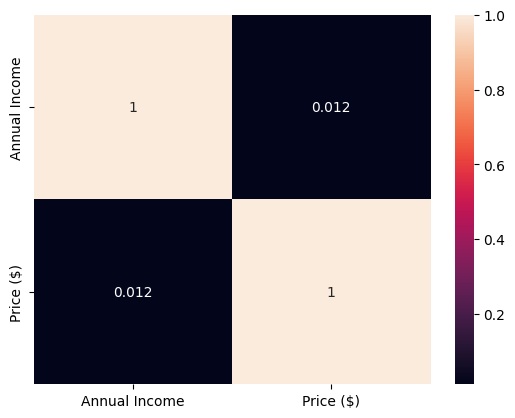

In [33]:
df_no_phone = df.drop(columns='Phone')
sns.heatmap(df_no_phone.corr(numeric_only=True),annot=True)
plt.show()

Observations:
* Automatic and manual cars have similar prices, but some automatic cars have a wider upper price range than manual cars.
* The correlation of 0.012 between price and annual income suggests a very weak positive relationship.
* The majority of sales are from cars priced between $12,000 and $34,000, with SUVs, hatchbacks, and sedans being the most sold body styles within this range.

### __Step 4| Predictive Model__

##### Step 4.1| __Dummies Variables__

In [45]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

col_list = ['Gender', 'Model', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

for colsn in col_list:
    df[colsn] = le.fit_transform(df[colsn].astype(str))

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income (binned),month,day,year
0,C_CND_000001,1/2/2022,Geraldine,1,13500,0,28,60,0,0,0,26000,06457-3834,3,8264678,4,Low,1,2,2022
1,C_CND_000002,1/2/2022,Gia,1,1480000,1,27,52,0,0,0,19000,60504-7114,3,6848189,0,Low,1,2,2022
2,C_CND_000003,1/2/2022,Gianna,1,1035000,12,24,57,1,1,2,31500,38701-8047,2,7298798,2,Low,1,2,2022
3,C_CND_000004,1/2/2022,Giselle,1,13500,22,20,36,1,1,1,14000,99301-3882,3,6257557,5,Low,1,2,2022
4,C_CND_000005,1/2/2022,Grace,1,1465000,21,0,141,0,0,2,24500,53546-9427,1,7081483,3,Low,1,2,2022


#####  Step 4.2 __Dates__

In [35]:
df[['month', 'day', 'year']] = df['Date'].str.split('/', n=2, expand=True)

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Annual Income (binned),month,day,year
0,C_CND_000001,1/2/2022,Geraldine,1,13500,0,8,Expedition,0,0,0,26000,06457-3834,3,8264678,4,Low,1,2,2022
1,C_CND_000002,1/2/2022,Gia,1,1480000,1,7,Durango,0,0,0,19000,60504-7114,3,6848189,0,Low,1,2,2022
2,C_CND_000003,1/2/2022,Gianna,1,1035000,2,4,Eldorado,1,1,2,31500,38701-8047,2,7298798,2,Low,1,2,2022
3,C_CND_000004,1/2/2022,Giselle,1,13500,4,27,Celica,1,1,1,14000,99301-3882,3,6257557,5,Low,1,2,2022
4,C_CND_000005,1/2/2022,Grace,1,1465000,3,0,TL,0,0,2,24500,53546-9427,1,7081483,3,Low,1,2,2022


##### Step 4.3 __Model__

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model_df = df[['Gender', 'Model', 'Annual Income', 'Dealer_Name', 'Company', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'month', 'day', 'year', 'Price ($)']]

#Variables definition
x = model_df[['Gender', 'Model', 'Engine', 'Transmission', 'Company', 'Color', 'Body Style', 'Dealer_Region']]
y = model_df[['Price ($)']]

#Train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2203)

#Test
rf_tree = RandomForestRegressor(n_estimators=100)
rf_tree = rf_tree.fit(x_train, y_train)

score = rf_tree.score(x_test, y_test)

print("RandomForestRegressor r2 score is:", str(score))

c:\Users\Briggitte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor r2 score is: 0.622197706000471
